In [ ]:
#1. package 가져오기

import numpy as np
import pandas as pd

print(np.__version__)
print(pd.__version__)


1.18.5
1.0.5


In [ ]:
# 2. Data 업로드

from google.colab import files
data = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads (1).csv


In [ ]:
ls

 sample_data/  'Social_Network_Ads (1).csv'   Social_Network_Ads.csv


In [ ]:
# 3. 데이터 프레임

data = pd.read_csv('Social_Network_Ads.csv')
data.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15813113,Male,40.0,107000.0,1
396,15814004,Male,27.0,20000.0,0
397,15814553,Male,57.0,60000.0,1
398,15814816,Male,31.0,66000.0,0
399,15815236,Female,45.0,131000.0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           394 non-null    object 
 2   Age              390 non-null    float64
 3   EstimatedSalary  388 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [ ]:
data.describe(include='all')

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,394,390.000000,388.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,202,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.782051,69628.865979,0.357500
std,7.165832e+04,NaN,10.452300,33889.337949,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,30.000000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,87250.000000,1.000000


In [ ]:
# 4. feature/label 분리

feature = data.iloc[:,1:-1]
label = data.iloc[:, -1].values

print(feature)
print(label)

     Gender   Age  EstimatedSalary
0    Female  35.0          57000.0
1    Female  58.0          95000.0
2    Female  26.0          80000.0
3      Male  34.0         115000.0
4    Female  33.0          41000.0
..      ...   ...              ...
395    Male  40.0         107000.0
396    Male  27.0          20000.0
397    Male  57.0          60000.0
398    Male  31.0          66000.0
399  Female  45.0         131000.0

[400 rows x 3 columns]
[0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1
 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0
 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0
 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0
 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 

In [ ]:
# 5. 빠진 값 확인 

feature.isnull().sum()

Gender              6
Age                10
EstimatedSalary    12
dtype: int64

In [ ]:
# 6. Clean Missing Data 1 - numeric

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
# imputer.fit(feature.iloc[:,1:])
# feature.iloc[:,1:] = imputer.transform(feature.iloc[:,1:])
feature.iloc[:,1:] = imputer.fit_transform(feature.iloc[:,1:])

feature.isnull().sum()

Gender             6
Age                0
EstimatedSalary    0
dtype: int64

In [ ]:
# 6. Clean Missing Data 2 - string

string_imputer = SimpleImputer(strategy='most_frequent')
feature.iloc[:,0] = string_imputer.fit_transform(feature.iloc[:,:1])

feature.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
dtype: int64

In [ ]:
print(type(feature.iloc[:,0]))
print(type(feature.iloc[:,[0]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
?SimpleImputer

In [ ]:
feature.head()

,Gender,Age,EstimatedSalary
0,Female,35.0,57000.0
1,Female,58.0,95000.0
2,Female,26.0,80000.0
3,Male,34.0,115000.0
4,Female,33.0,41000.0


In [ ]:
# 7. One hot encoding

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

columnTransformer = ColumnTransformer([('onehotencoder', 
                                        OneHotEncoder(),[0])],
                                      remainder='passthrough')
feature = columnTransformer.fit_transform(feature)

print(feature)

[[1.00e+00 0.00e+00 3.50e+01 5.70e+04]
 [1.00e+00 0.00e+00 5.80e+01 9.50e+04]
 [1.00e+00 0.00e+00 2.60e+01 8.00e+04]
 ...
 [0.00e+00 1.00e+00 5.70e+01 6.00e+04]
 [0.00e+00 1.00e+00 3.10e+01 6.60e+04]
 [1.00e+00 0.00e+00 4.50e+01 1.31e+05]]


In [ ]:
# 8. split data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature, 
                                                    label,
                                                    test_size=0.2,
                                                    random_state=1)

print(X_test[:3])
# print(X_test.shape)
# print(X_train.shape)
# print(y_test.shape)
# print(y_train.shape)


[[0.0e+00 1.0e+00 3.1e+01 6.6e+04]
 [0.0e+00 1.0e+00 4.5e+01 2.2e+04]
 [0.0e+00 1.0e+00 4.2e+01 6.5e+04]]


In [ ]:
# Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train[:3])

[[-1.07128475  1.07128475  0.94451912 -0.84357642]
 [-1.07128475  1.07128475  0.24517775  0.21487646]
 [ 0.93345864 -0.93345864 -0.05453998 -0.42019527]]


In [ ]:
# 9. train

from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# 10. Score

y_pred = logistic.predict(X_test)
print(y_pred)

[0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0
 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 1 0 1]


In [ ]:
# 11. Evaluate
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8375


In [ ]:
# 12. Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)


[[45  4]
 [ 9 22]]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


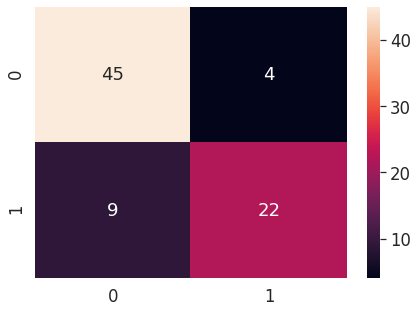

In [ ]:
# 13. CM Visualize

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.set(font_scale=1.5)
sns.heatmap(cm, annot = True)